# **About**

## **Libraries**

In [1]:
!pip install scikit-optimize
!pip install kaggle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 4.4 MB/s eta 0:00:00


In [40]:
from sklearn.metrics import accuracy_score, make_scorer, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from skopt.space import Integer, Real, Categorical
from skopt import BayesSearchCV
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns
import pandas as pd
import numpy as np
import joblib
import os

### **Setting Up**

In [3]:
plt.style.use("dark_background")

## **Collect Data**

### **Original**

In [4]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"crbsdndr","key":"b5da38c74068c438b0a974cdd6aad1fc"}'}

In [5]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d mysarahmadbhat/lung-cancer
!unzip "./lung-cancer.zip" -d "/content/"

Dataset URL: https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer
License(s): CC0-1.0
Archive:  ./lung-cancer.zip
  inflating: /content/survey lung cancer.csv  


In [7]:
os.rename("survey lung cancer.csv", "lung_cancer.csv")

In [8]:
lung_original = pd.read_csv("./lung_cancer.csv")
lung_original.tail(3)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


#### **Data Information**

In [9]:
lung_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [10]:
print(f"Total missing values: {lung_original.isna().sum().sum()}")
print(f"Total duplicates: {lung_original.duplicated().sum()}")

Total missing values: 0
Total duplicates: 33


In [11]:
lung_original.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


### **Synthetics**

In [12]:
files.upload()

Saving lung_synrhetics_old.csv to lung_synrhetics_old.csv


{'lung_synrhetics_old.csv': b'GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER\r\nM,71,2,1,2,1,2,2,1,2,2,2,2,2,2,YES\r\nF,58,1,2,1,2,1,1,2,2,1,2,1,1,1,NO\r\nM,65,1,2,2,1,1,2,1,2,2,1,2,2,2,YES\r\nF,62,2,1,1,1,2,2,1,1,1,1,2,1,1,NO\r\nM,67,2,2,2,2,2,1,2,1,2,2,1,1,2,YES\r\nF,55,1,1,2,2,1,1,2,1,1,1,1,2,1,YES\r\nM,60,1,1,1,1,1,2,2,2,2,2,2,1,2,YES\r\nF,63,2,2,1,1,2,1,1,2,1,1,2,1,2,NO\r\nM,72,2,1,2,1,2,2,1,2,2,2,2,2,2,YES\r\nF,49,1,2,2,2,2,2,2,2,1,2,2,2,1,YES\r\nM,56,2,1,1,1,1,1,2,1,1,1,1,1,2,NO\r\nF,70,1,1,1,2,2,2,1,1,2,1,2,1,1,YES\r\nM,53,1,2,2,1,1,1,1,2,2,2,2,2,1,YES\r\nF,59,2,1,1,2,1,2,1,1,1,1,2,1,1,NO\r\nM,68,2,2,2,1,1,2,2,1,2,1,2,1,2,YES\r\nF,61,1,2,1,1,2,1,2,2,1,2,1,2,1,YES\r\nM,64,1,1,1,1,2,2,2,2,2,2,2,1,2,YES\r\nF,57,2,1,1,1,1,1,1,1,1,1,1,1,1,NO\r\nM,69,1,2,1,2,1,2,1,2,2,2,2,2,1,YES\r\nF,54,2,2,2,2,2,1,1,2,1,2,1,2,2,YES\r\nM,58,1,1,1,1,1,1,2,2,2,2

In [13]:
lung_synthetics = pd.read_csv("./lung_synrhetics_old.csv")
lung_synthetics.tail(3)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
240,F,80,1,1,2,1,2,2,1,1,1,1,2,1,1,NO
241,M,92,1,1,1,1,1,2,2,1,1,1,1,2,1,NO
242,F,84,1,2,1,1,2,1,1,2,1,1,1,1,2,NO


#### **Data Information**

In [14]:
lung_synthetics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 243 non-null    object
 1   AGE                    243 non-null    int64 
 2   SMOKING                243 non-null    int64 
 3   YELLOW_FINGERS         243 non-null    int64 
 4   ANXIETY                243 non-null    int64 
 5   PEER_PRESSURE          243 non-null    int64 
 6   CHRONIC DISEASE        243 non-null    int64 
 7   FATIGUE                243 non-null    int64 
 8   ALLERGY                243 non-null    int64 
 9   WHEEZING               243 non-null    int64 
 10  ALCOHOL CONSUMING      243 non-null    int64 
 11  COUGHING               243 non-null    int64 
 12  SHORTNESS OF BREATH    243 non-null    int64 
 13  SWALLOWING DIFFICULTY  243 non-null    int64 
 14  CHEST PAIN             243 non-null    int64 
 15  LUNG_CANCER            

In [15]:
print(f"Total missing values: {lung_synthetics.isna().sum().sum()}")
print(f"Total duplicates: {lung_synthetics.duplicated().sum()}")

Total missing values: 0
Total duplicates: 10


In [16]:
lung_synthetics.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,35.218107,1.526749,1.473251,1.526749,1.518519,1.288066,1.551440,1.349794,1.609053,1.403292,1.629630,1.592593,1.353909,1.584362
std,23.614801,0.500314,0.500314,0.500314,0.500688,0.453797,0.498373,0.477889,0.488970,0.491571,0.483901,0.492366,0.479168,0.493849
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,30.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000
75%,54.500000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,100.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


## **Data Preprocessing**

### **Combined**

#### **Format Data**

In [17]:
lung_format_original = lung_original.copy()
lung_format_synthetics = lung_synthetics.copy()

def format_(*, dataset):
  return [column.strip().lower().replace(" ", "_") for column in dataset.columns]

lung_format_original.columns = format_(dataset=lung_format_original)
lung_format_synthetics.columns = format_(dataset=lung_format_synthetics)

In [18]:
lung_format_combined = pd.concat([
    lung_format_original, lung_format_synthetics
]).reset_index(drop=True)
lung_format_combined.tail(3)

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,lung_cancer
549,F,80,1,1,2,1,2,2,1,1,1,1,2,1,1,NO
550,M,92,1,1,1,1,1,2,2,1,1,1,1,2,1,NO
551,F,84,1,2,1,1,2,1,1,2,1,1,1,1,2,NO


#### **Clean Data**

In [19]:
lung_cleaned_combined = lung_format_combined.copy()

def drop_duplicates_(*, dataset):
  dataset.drop_duplicates(inplace=True)
  dataset.reset_index(drop=True, inplace=True)

  print(f"Total duplicates: {dataset.duplicated().sum()}")

  return dataset

lung_cleaned_combined = drop_duplicates_(dataset=lung_cleaned_combined)

Total duplicates: 0


#### **Scaling**

In [20]:
lung_scaled_combined = lung_cleaned_combined.copy()

def scale(*, dataset, column_):
  dataset[
    dataset.drop(columns=["gender", "age", "lung_cancer"]).columns
  ] = dataset.drop(columns=["gender", "age", "lung_cancer"]) - 1

  max_value = dataset[column_].max()
  min_value = dataset[column_].min()

  dataset[column_] = (dataset[column_] - min_value) / (max_value - min_value)
  return dataset

lung_scaled_combined = scale(dataset=lung_scaled_combined, column_="age")

#### **Encoding**

In [21]:
lung_encoded_combined = lung_scaled_combined.copy()

def encoding(*, dataset, column_, operation):
  if operation == "one_hot":
    try:
      column_idx = dataset.columns.get_loc(column_)
    except KeyError:
      print(f"Error: Column \"{column_}\" not found in the given dataset.")
      return dataset

    encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
    encoded_data = encoder.fit_transform(dataset[[column_]]).astype(int)
    encoded_df = pd.DataFrame(
        encoded_data,
        columns=[column_.lower() for column_ in encoder.get_feature_names_out([column_])],
    )

    df_before = dataset.iloc[:, :column_idx]
    df_after = dataset.iloc[:, column_idx + 1:]

    dataset_updated = pd.concat([df_before, encoded_df, df_after], axis=1)
    print(f"Column {column_} succesfully encoded in the given dataset.")
    return dataset_updated


  elif operation == "label":
      label_encoder = LabelEncoder()

      encoded_column = dataset[column_].copy()
      dataset[column_] = label_encoder.fit_transform(encoded_column)

      print(f"Column {column_} succesfully encoded in the given dataset.")
      return dataset

lung_encoded_combined = encoding(dataset=lung_encoded_combined, column_="gender", operation="one_hot")
lung_encoded_combined = encoding(dataset=lung_encoded_combined, column_="lung_cancer", operation="label")

Column gender succesfully encoded in the given dataset.
Column lung_cancer succesfully encoded in the given dataset.


In [22]:
lung_encoded_combined.tail(3)

,gender_f,gender_m,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,lung_cancer
490,1,0,0.797980,0,0,1,0,1,1,0,0,0,0,1,0,0,0
491,0,1,0.919192,0,0,0,0,0,1,1,0,0,0,0,1,0,0
492,1,0,0.838384,0,1,0,0,1,0,0,1,0,0,0,0,1,0


## **Data Exploration**

### **Combined**

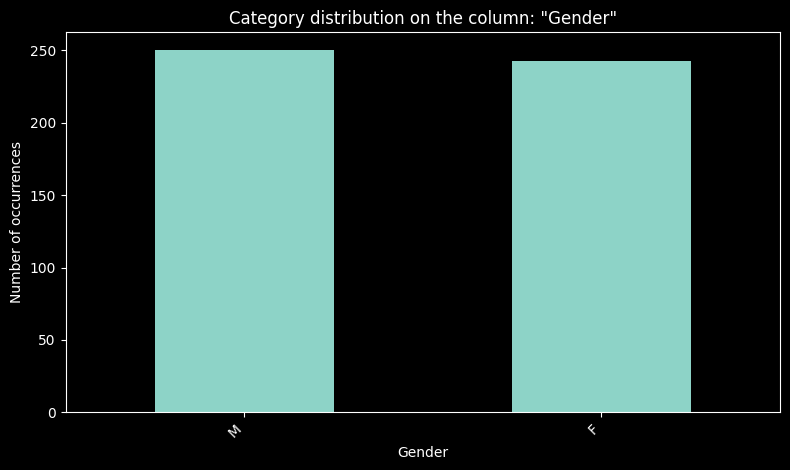

In [23]:
def show_distribution(*, dataset, column_):
    if column_ not in dataset.columns:
        print(f"Error: The column with the name \"{column_}\" is not found in the given dataset.")
        return

    value_counts = dataset[column_].value_counts()

    plt.figure(figsize=(8, 4.8))
    value_counts.plot(kind='bar')

    plt.title(f"Category distribution on the column: \"{column_.capitalize()}\"")
    plt.xlabel(column_.capitalize())
    plt.ylabel("Number of occurrences")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

show_distribution(dataset=lung_scaled_combined, column_="gender")

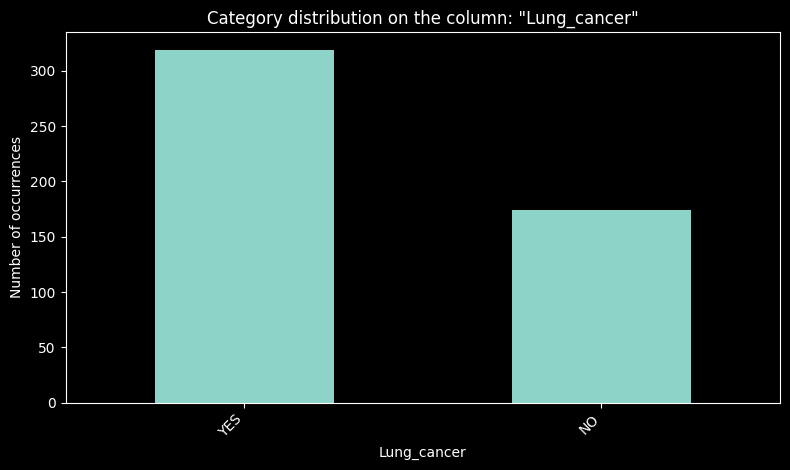

In [24]:
show_distribution(dataset=lung_cleaned_combined, column_="lung_cancer")

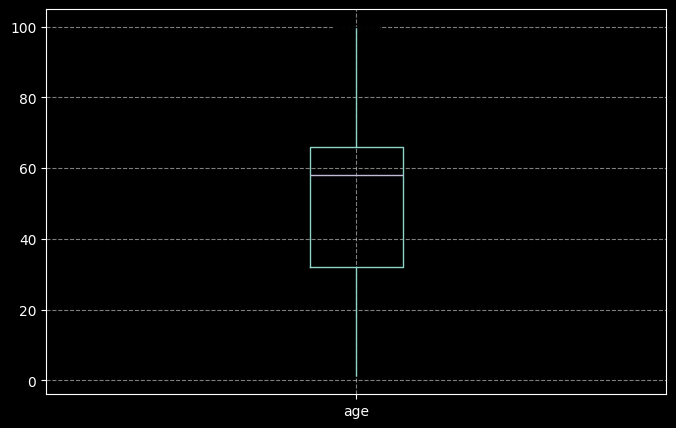

In [25]:
def create_boxplot(*, dataset, column_):
    plt.figure(figsize=(8, 5))
    dataset[[column_]].boxplot()

    plt.grid(linestyle='--', alpha=0.5)
    plt.show()

create_boxplot(dataset=lung_cleaned_combined, column_="age")

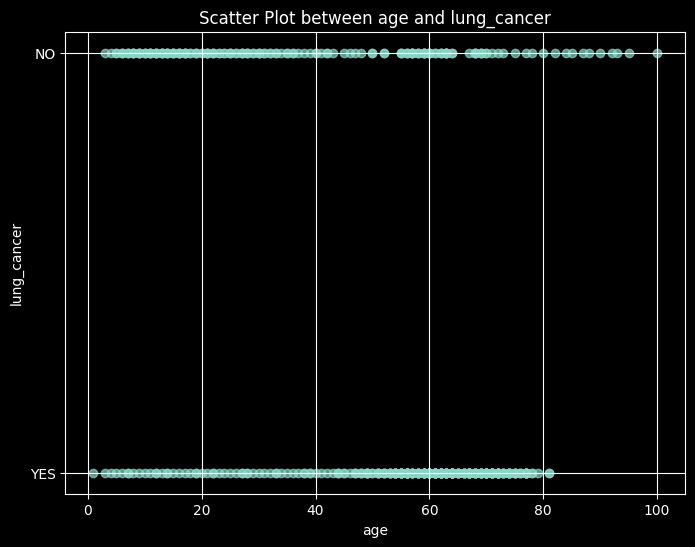

In [26]:
def visualize_scatter_plot(*, dataset, feature_a, feature_b) -> None:
  if not isinstance(dataset, pd.DataFrame):
    raise TypeError("Parameter 'dataset' must be a Pandas DataFrame.")

  if feature_a not in dataset.columns:
    raise ValueError(f"Feature '{feature_a}' not found in dataset.")
  if feature_b not in dataset.columns:
    raise ValueError(f"Feature '{feature_b}' not found in dataset.")

  plt.figure(figsize=(8, 6))
  plt.scatter(dataset[feature_a], dataset[feature_b], alpha=0.7)

  plt.xlabel(feature_a)
  plt.ylabel(feature_b)
  plt.title(f'Scatter Plot between {feature_a} and {feature_b}')
  plt.grid(True)

  plt.show()

visualize_scatter_plot(dataset=lung_cleaned_combined, feature_a="age", feature_b="lung_cancer")

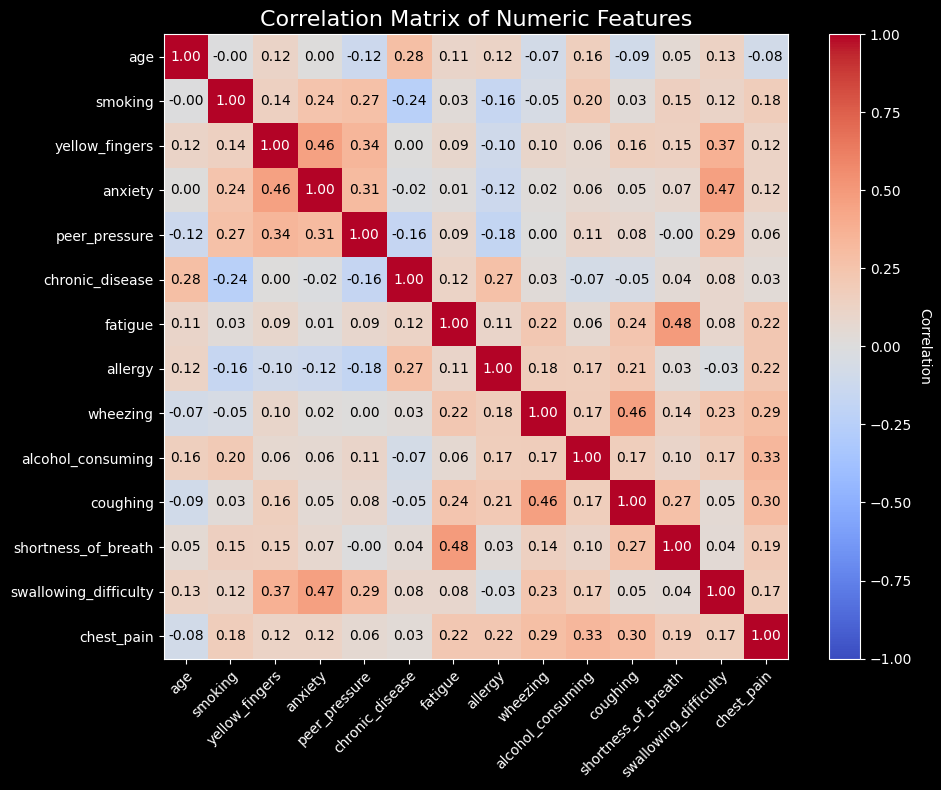

In [27]:
def visualize_correlation_matrix(*, dataset):
  numeric_dataframe = dataset.select_dtypes(include=np.number)

  if numeric_dataframe.empty:
    print("No numeric columns found in the DataFrame to calculate correlation.")
    return
  if numeric_dataframe.shape[1] < 2:
    print("At least two numeric columns are required to calculate correlation.")
    return

  correlation_matrix = numeric_dataframe.corr()
  labels = correlation_matrix.columns

  fig, ax = plt.subplots(figsize=(10, 8))

  im = ax.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)

  cbar = ax.figure.colorbar(im, ax=ax)
  cbar.ax.set_ylabel("Correlation", rotation=-90, va="bottom")

  ax.set_xticks(np.arange(len(labels)))
  ax.set_yticks(np.arange(len(labels)))
  ax.set_xticklabels(labels)
  ax.set_yticklabels(labels)

  plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
           rotation_mode="anchor")

  for i in range(len(labels)):
      for j in range(len(labels)):
          text_color = "white" if abs(correlation_matrix.iloc[i, j]) > 0.6 else "black"
          text = ax.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}",
                         ha="center", va="center", color=text_color)

  ax.set_title("Correlation Matrix of Numeric Features", fontsize=16)
  fig.tight_layout()
  plt.show()

visualize_correlation_matrix(dataset=lung_cleaned_combined)

#### **Action**

In [28]:
lung_explored_combined = lung_encoded_combined.copy()

lung_explored_combined.drop(
    columns=["gender_m", "gender_f"], inplace=True
)

## **Developing Model**

### **Data Splitting**

#### **Combined**

In [29]:
X = lung_explored_combined.drop(columns=["lung_cancer"])
y = lung_explored_combined["lung_cancer"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

### **Training**

In [31]:
def bayesian_tune_rf(
    X_train, y_train,
    n_iter=50, cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
):
    search_space = {
        'n_estimators': Integer(50, 500),
        'max_depth': Integer(3, 30),
        'min_samples_split': Integer(2, 20),
        'min_samples_leaf': Integer(1, 10),
        'max_features': Real(0.1, 1.0, 'uniform'),
        'bootstrap': Categorical([True, False]),
        'criterion': Categorical(['gini', 'entropy'])
    }

    rf = RandomForestClassifier(random_state=random_state, n_jobs=1)
    cv_method = StratifiedKFold(n_splits=cv, shuffle=True, random_state=random_state)

    scorer = make_scorer(accuracy_score)

    bayes_opt = BayesSearchCV(
        estimator=rf,
        search_spaces=search_space,
        n_iter=n_iter,
        cv=cv_method,
        scoring=scorer,
        verbose=verbose,
        random_state=random_state,
        n_jobs=n_jobs,
        return_train_score=True
    )

    bayes_opt.fit(X, y)

    results = {
        'best_model': bayes_opt.best_estimator_,
        'best_params': bayes_opt.best_params_,
        'best_score': bayes_opt.best_score_,
        'optimizer': bayes_opt,
    }

    return results


def apply_tuned_rf(best_params, X_train, y_train, X_test, y_test):
    params = best_params.copy()

    model = RandomForestClassifier(
        **params,
        random_state=42,
        n_jobs=-1
    )

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    metrics = {
        "accuracy": accuracy_score(y_test, y_pred),
        "classification_report": classification_report(y_test, y_pred),
        "confusion_matrix": confusion_matrix(y_test, y_pred),
    }

    return {
        "model": model,
        "metrics": metrics,
        "parameters": params
    }

def tampilkan_prediksi_salah(model, X_test, y_test, n_samples=10):
    y_pred = model.predict(X_test)

    y_test = np.array(y_test)
    y_pred = np.array(y_pred)

    indeks_salah = np.where(y_test != y_pred)[0]

    if len(indeks_salah) == 0:
        print("Tidak ada sampel yang salah diprediksi!")
        return None

    jumlah_tampil = min(n_samples, len(indeks_salah))
    indeks = np.random.choice(indeks_salah, size=jumlah_tampil, replace=False)

    if isinstance(X_test, pd.DataFrame):
        hasil = X_test.iloc[indeks].copy()
    else:
        kolom = [f'fitur_{i}' for i in range(X_test.shape[1])]
        hasil = pd.DataFrame(X_test[indeks], columns=kolom)

    hasil['Label_Asli'] = y_test[indeks]
    hasil['Label_Prediksi'] = y_pred[indeks]

    return hasil

In [32]:
tuning_results = bayesian_tune_rf(
    X_train=X_train,
    y_train=y_train,
    n_iter=30,
    cv=5
)

best_params = tuning_results['best_params']

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [33]:
final_model_results = apply_tuned_rf(
    best_params=best_params,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test
)

print("Final Accuracy:", final_model_results["metrics"]["accuracy"])
print("Classification Report:\n", final_model_results["metrics"]["classification_report"])

Final Accuracy: 0.9595959595959596
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        33
           1       0.96      0.98      0.97        66

    accuracy                           0.96        99
   macro avg       0.96      0.95      0.95        99
weighted avg       0.96      0.96      0.96        99



In [34]:
lung_synthetics.max()["AGE"]

np.int64(100)

In [35]:
lung_original.max()["AGE"]

np.int64(87)

In [36]:
sampel_salah = tampilkan_prediksi_salah(
    model=final_model_results['model'],
    X_test=X_test,
    y_test=y_test,
    n_samples=10
)

sampel_salah

,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,Label_Asli,Label_Prediksi
2,0.585859,0,0,0,1,0,1,0,1,0,1,1,0,1,0,1
272,0.585859,1,0,0,0,1,1,1,0,0,0,1,0,0,0,1
73,0.595960,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0
478,0.777778,0,0,0,0,1,1,1,0,0,0,1,0,0,0,1


In [37]:
my_sample = pd.DataFrame({
    "age": [17],
    "smoking": [0],
    "yellow_fingers": [0],
    "anxiety": [1],
    "peer_pressure": [1],
    "chronic_disease": [0],
    "fatigue": [1],
    "allergy": [0],
    "wheezing": [0],
    "alcohol_consuming": [0],
    "coughing": [0],
    "shortness_of_breath": [0],
    "swallowing_difficulty": [0],
    "chest_pain": [0],
})
min_value =lung_cleaned_combined["age"].min()
max_value = lung_cleaned_combined["age"].max()

age_scaled = (my_sample["age"] - min_value) / (max_value - min_value)
print(f"Personal data prediction results: {'Positive' if final_model_results['model'].predict(my_sample)[0] else 'Negative'}")

Personal data prediction results: Negative


In [38]:
os.makedirs("models", exist_ok=True)
joblib.dump(final_model_results['model'], "./models/lung_cancer_detector.joblib")

['./models/lung_cancer_detector.joblib']

### **Inference**

In [43]:
model = joblib.load("./models/lung_cancer_detector.joblib")

In [44]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, confusion_matrix, classification_report,
                            roc_curve, auc)

def evaluate_random_forest(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for positive class

    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred)
    }

    # Print metrics
    print("Model Evaluation Metrics:")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1 Score: {metrics['f1_score']:.4f}")
    print("\nClassification Report:")
    print(metrics['classification_report'])

    # Create visualizations
    plt.figure(figsize=(15, 10))

    # 1. Confusion Matrix
    plt.subplot(2, 2, 1)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title('Confusion Matrix')

    # 2. ROC Curve
    plt.subplot(2, 2, 2)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

    # 3. Feature Importance
    plt.subplot(2, 2, 3)
    feature_importances = model.feature_importances_
    features = X_test.columns if hasattr(X_test, 'columns') else range(len(feature_importances))
    sns.barplot(x=feature_importances, y=features)
    plt.title('Feature Importances')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')

    # 4. Metrics Comparison
    plt.subplot(2, 2, 4)
    metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    metric_values = [metrics['accuracy'], metrics['precision'], metrics['recall'], metrics['f1_score']]
    sns.barplot(x=metric_names, y=metric_values, palette='viridis')
    plt.title('Performance Metrics Comparison')
    plt.ylim(0, 1)

    plt.tight_layout()
    plt.show()

    return metrics

Model Evaluation Metrics:
Accuracy: 0.9596
Precision: 0.9559
Recall: 0.9848
F1 Score: 0.9701

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        33
           1       0.96      0.98      0.97        66

    accuracy                           0.96        99
   macro avg       0.96      0.95      0.95        99
weighted avg       0.96      0.96      0.96        99



<ipython-input-44-6259435301aa>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_names, y=metric_values, palette='viridis')


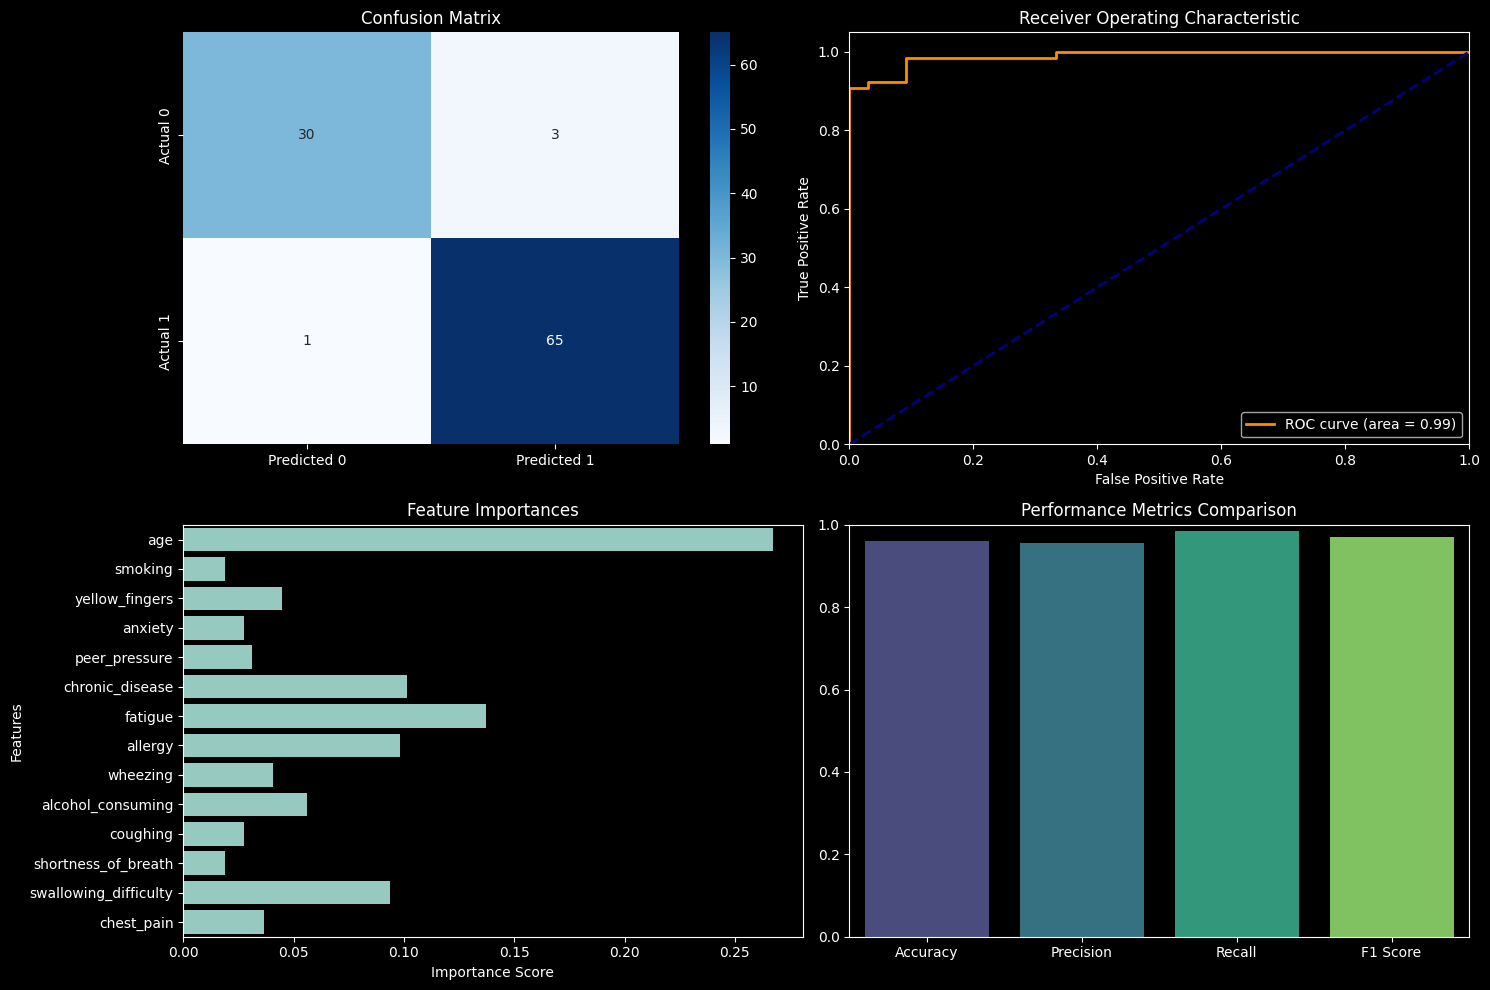

{'accuracy': 0.9595959595959596,
 'precision': 0.9558823529411765,
 'recall': 0.9848484848484849,
 'f1_score': 0.9701492537313433,
 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.97      0.91      0.94        33\n           1       0.96      0.98      0.97        66\n\n    accuracy                           0.96        99\n   macro avg       0.96      0.95      0.95        99\nweighted avg       0.96      0.96      0.96        99\n'}

In [45]:
evaluate_random_forest(model=model, X_test=X_test, y_test=y_test)